In [ ]:
import pickle as pk
import tensorflow as tf
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2,3"
for d in ['/device:GPU:2', '/device:GPU:3']:
  with tf.device(d):
    import keras
    from keras.models import Sequential
    #from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose,Activation
    from keras.layers.normalization import BatchNormalization
    from keras import backend as K
    epochs = 10
    batch_size =64
    pickle_train = open("noiseCafe_20.pickle","rb")
    x_train = pk.load(pickle_train)
    pickle_trainlabel = open("cleanCafe.pickle","rb")
    y_train = pk.load(pickle_trainlabel)

    print("Got the input data")
    #x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    print(np.asarray(x_train).shape)
    #     print(x_train[0:10].shape)
    X_train = []
    #X_train = np.asarray(X_train)
    for i in range(7,len(x_train)):
        X_train.append(x_train[i-7:i+1])
    #     temp = x_train[i-7]
    #     for j in range(1,8):
    #         temp = np.concatenate((temp,x_train[(i-7)+j]),axis=1)
    #     X_train.append(temp)

    X_train = np.asarray(X_train)
    print("H",np.asarray(X_train).shape)
    # X_train = X_train.reshape(X_train.shape[0], 129, 128, 1)
    # print("H2",np.asarray(X_train).shape)
    y_train = y_train.reshape(y_train.shape[0],1,129, 16)


    model = Sequential()
    model.add(Conv2D(64, kernel_size=(7, 7),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',data_format= "channels_first",input_shape=(8,129,16)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (5, 5),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',data_format= "channels_first"))
    #model.add(Conv2DTranspose(128, (3, 3), activation='relu',padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2DTranspose(128, (3, 3),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2DTranspose(64, (5, 5),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2DTranspose(1, (7, 7),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999),
                  metrics=['accuracy'])
    #model.build()
    #     def ATH():
    #         return 3.64*(pow(f/1000,0.8)) - 6.5*(np.exp(0.6*(pow(f/1000-3.3,2)))) + 0.001*(pow(f/1000,4))

    #     def myloss(y_true,y_pred,weights):
    #         return np.mean((weights(y_true-y_pred))**2)

    print(model.summary())
    model.fit(np.asarray(X_train), np.asarray(y_train[7:]),
              batch_size=batch_size,
              epochs=epochs,
              validation_split = 0.01
             )

    model.save_weights('weights_8frames_10.h5')
    model.save('model_8frames_10.h5')

Using TensorFlow backend.


Got the input data
(29120, 129, 128)
H (29113, 8, 129, 128)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 123, 122)      25152     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 123, 122)      488       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 123, 122)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 119, 118)     204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 119, 118)     472       
_________________________________________________________________
activation_2 (Activation)    (None, 128, 119, 118)     0         
_________________________________________________________________
conv2d_3 (Conv2D

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



22080/28821 [=====================>........] - ETA: 1:19 - loss: 5.8137 - acc: 0.3384

In [1]:
from keras.models import load_model
new_model = load_model('model_8frames_30.h5')

Using TensorFlow backend.


In [5]:
from scipy import signal
from scipy.io import wavfile
import numpy as np
sample_rate, samples = wavfile.read('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/Noisy_TCDTIMIT/Cafe/20/lipspeakers/Lipspkr2/straightcam/si1308.wav')
print(sample_rate)
print(len(samples))
print(samples.shape)
print((samples).shape)
NoiseBabble= []
Phase = []
f, t, Zxx = signal.stft(samples, sample_rate,nperseg=256,nfft=256)
print("Z",Zxx.shape)
phase = np.angle(Zxx)
T = len(t)//128
print("T",T)
for i in range(0,(T)*128,128):
  NoiseBabble.append(np.log(np.abs(Zxx[:,i:i+128])+1e-8))
  Phase.append(phase[:,i:i+128])
print("N",np.asarray(NoiseBabble).shape)
X_NoiseBabble = []
NoiseBabble = np.asarray(NoiseBabble)
print("S",NoiseBabble.shape)
for i in range(0,7):
    print(np.asarray(X_NoiseBabble).shape)
    X_NoiseBabble.append(NoiseBabble[0:8])
for i in range(7,len(NoiseBabble)):
    X_NoiseBabble.append(NoiseBabble[i-7:i+1])
print("H1",np.asarray(X_NoiseBabble).shape)
b = np.asarray(X_NoiseBabble)
rectified = new_model.predict(b)
print(rectified.shape)
rectified =rectified.reshape(rectified.shape[0], 129, 128)
print(rectified.shape)
A = np.zeros((129,0))
for i in range(T):
  S = np.exp(rectified[i])
  A = np.append(A,S*np.cos(Phase[i]) + 1j * S*np.sin(Phase[i]),axis=1)
t,x = signal.istft(A,nperseg=256,nfft=256)
x = np.asarray(x, dtype=np.int16)
#print(len(x))
#data=np.int16(x/np.max(np.abs(x)) * 32767)
wavfile.write('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/code/cafe/testing/frames_si1021.wav', 16000, x)

16000
135851
(135851,)
(135851,)
Z (129, 1063)
T 8
N (8, 129, 128)
S (8, 129, 128)
(0,)
(1, 8, 129, 128)
(2, 8, 129, 128)
(3, 8, 129, 128)
(4, 8, 129, 128)
(5, 8, 129, 128)
(6, 8, 129, 128)
H1 (8, 8, 129, 128)
(8, 1, 129, 128)
(8, 129, 128)


In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"


In [2]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()



from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

['/device:GPU:0', '/device:GPU:1']

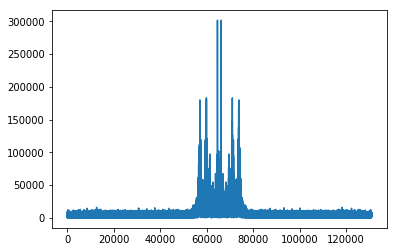

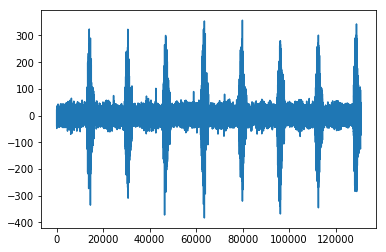

In [10]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile

fs, data = wavfile.read('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/code/cafe/testing/frames_si1021.wav')
fft_out = (fft(data))
FFT = np.fft.fftshift(fft_out)
plt.plot(np.arange(0,data.shape[0]), np.abs(FFT))
plt.show()
plt.plot(np.arange(0,data.shape[0]),data)
plt.show()

# plt.plot(np.arange(0,data.shape[0]),np.fft.ifft(fft_out))
# plt.show()

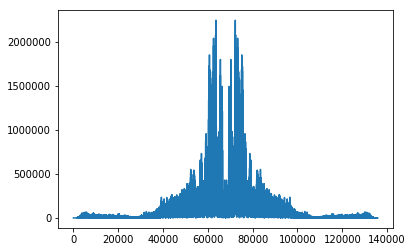

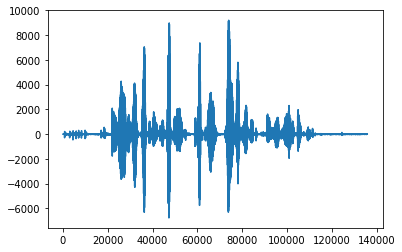

In [9]:
fs, data = wavfile.read('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/Clean/lipspeakers/Lipspkr2/straightcam/si1308.wav')
fft_out = np.fft.fftshift(fft(data))
plt.plot(np.arange(0,data.shape[0]), np.abs(fft_out))
plt.show()
plt.plot(np.arange(0,data.shape[0]),data)
plt.show()